In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import functools
import jax
import jax.numpy as jp
import jax_flock as jf
import matplotlib.pyplot as plt
import stats
from flax import struct

In [8]:
@struct.dataclass
class State:
    position: jax.Array
    key: jax.Array

def init(key):
    key, subkey = jax.random.split(key)
    position = jax.vmap(jf.random_unit_vector)(jax.random.split(subkey, 100)) * 30
    return State(position=position, key=key)

def next_state(state):
    return init(state.key)


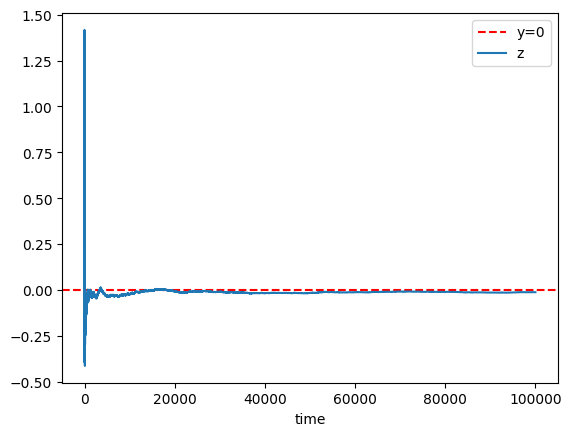

In [9]:

def average_z(state) -> float:
    return jp.mean(state.position[:, 2])

key = jax.random.PRNGKey(0)
state = init(key)
zs = stats.time_average_with_history(state, next_state, 100000, average_z)

plt.axhline(y=0, color='r', linestyle='--', label=f'y=0')
plt.plot(zs, label='z')
plt.xlabel('time')
plt.legend()


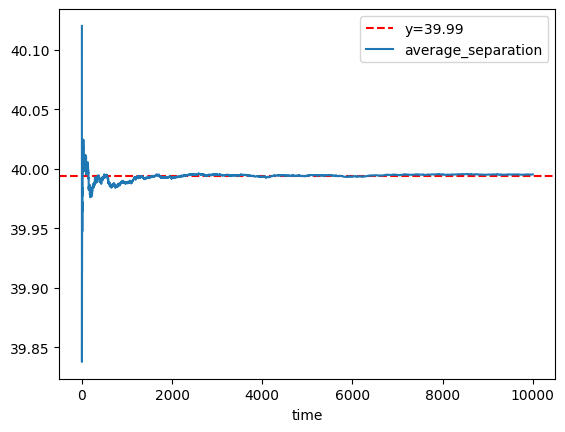

In [13]:
def average_separation(state: jf.State) -> float:
    positions = state.position
    n_agents = positions.shape[0]
    idx = jp.triu_indices(n_agents, k=1)
    return jp.mean(jp.linalg.norm(positions[idx[0]] - positions[idx[1]], axis=-1))


state = init(jax.random.PRNGKey(0))
seps = stats.time_average_with_history(state, next_state, 10000, average_separation)
convergence = jp.mean(seps)
plt.axhline(y=convergence, color='r', linestyle='--', label=f'y={convergence:.2f}')
plt.plot(seps, label='average_separation')
plt.xlabel('time')
plt.legend()


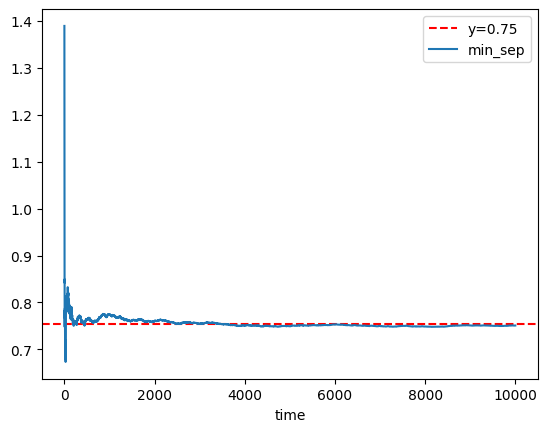

In [14]:
def min_sep(state: jf.State) -> float:
    positions = state.position
    n_agents = positions.shape[0]
    idx = jp.triu_indices(n_agents, k=1)
    return jp.min(jp.linalg.norm(positions[idx[0]] - positions[idx[1]], axis=-1))


state = init(jax.random.PRNGKey(0))
seps = stats.time_average_with_history(state, next_state, 10000, min_sep)
convergence = jp.mean(seps)
plt.axhline(y=convergence, color='r', linestyle='--', label=f'y={convergence:.2f}')
plt.plot(seps, label='min_sep')
plt.xlabel('time')
plt.legend()

